  

  # An data driven approach for Prediction & enhancing energy efficiency in Domestic EPCs of Barnet 

On this assignment we are going to address a critical challenge that being the enhancement of building / apartment's energy efficiency by utilising data driven insights. By employing the dataset of the govermental website we aim to analyse , model & predict energy efficiency ratings with end goal to generate recommendations that stakeholders / tenants can adopt to improve energy performance & reduce enviromental impact where possible collectively.

The significance of the issue : Energy efficiency on domestic EPC's is fundamental for reaching target goals for : sustainability / diminishing energy consumption & mitigate climate change. Residential along with commercial buildings make for a big part of total energy usage & carbon emissions. If we succesfully establish the key factors which influence the energy performance we would then be able to identify, implement targeted upgrades for energy efficiency & promoting caution - minimize enviromental pollution. 

In order to carry out the work and the analysis needed for the assignment we extracted a whole dataset for the domestic EPC's of the Barnet authority via the  ["Energy Performance of Buildings Data: England and Wales" : https://epc.opendatacommunities.org/domestic/search?address=&postcode=&local-authority=E09000017&constituency=&uprn=&from-month=1&from-year=2008&to-month=12&to-year=2024 ] it contains over 173000 records addressing : building characacteristics / energy ratings & consumption patterns. Although the dataset is great and covers extensively the data needed accross all key areas some limitation was noted : some incomplete data on key fields like energy ratings / building characteristics that can potentially 'skew' the analysis & results of our models. Some data entry errors (duplicate entries / outliers) which could also potentially 'skew' the whole result reliability. The representation of certain property types and energy rankings is limited (as of what reflects to what exists on Barnet) which can potentially result in bias in feature importace or modelling. 
The dataset also spans from 2008 all the way to 2024 and throughout this years building regulations, energy efficiency standarts , available technologies have been reshaped and evolved overall potentially making this variability may affect energy ratings / consumption patterns as older assestments may not properly compare with newer ones due to changes of criteria and evaluation methodology differences. 
The dataset does not include external factors as energy tariffs / other financial incentives or climate conditions to mention. All of those factors will be considered and reviewed during the proccessing of the dataset on the  cleansing / transforming stage

 Throughout this comprehensive analysis we are going to : Clean and transform the dataset for accuracy , Conduct exploratory / diagnostic analytics to find patterns / relationships in the data , develop predictive models in order to forecast the ratings of energy efficiency , identify critical features that influence the energy performance .
We will conclude with the evidence based generated reccomendations that will indicate the ideal economic - energy efficient approaches that will enhance the stakeholders / tenants efforts to achieve sustainability & minimized carbon footprint.


# Data Preparation and Feature Engineering

Reviewing the dataset :

In [31]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

from scipy.stats import zscore

import matplotlib.pyplot as plt






print("Shape")


print("records + columns :")
print(df.shape)

Shape
records + columns :
(173209, 92)


In [32]:
print("Dataset head sample")

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
print(df.head())


Dataset head sample


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\90522205.py:4: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                                             LMK_KEY               ADDRESS1  \
0  20e080e980b1adf8135ed034e06aa6538031386ca324da...  25 Priory Field Drive   
1                  760043321412014101221121693949196    70, Harcourt Avenue   
2                 1342791749962015071408401177498105         68, Swan Drive   
3                  736985809262016070111401454988456           16, Rose Way   
4                   50804143212009012217495402910959      Ground Floor Flat   

      ADDRESS2 ADDRESS3  POSTCODE  BUILDING_REFERENCE_NUMBER  \
0          NaN      NaN   HA8 9PT                10003615320   
1          NaN      NaN   HA8 8YN                 1692136968   
2          NaN      NaN   NW9 5DE                  700457378   
3          NaN      NaN   HA8 9SD                 5546044968   
4  8 The Drive      NaN  NW11 9SR                 9993326568   

  CURRENT_ENERGY_RATING POTENTIAL_ENERGY_RATING  CURRENT_ENERGY_EFFICIENCY  \
0                     C                       B               

In [36]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

# Step 1: Inspect the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1185702805.py:5: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173209 entries, 0 to 173208
Data columns (total 92 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LMK_KEY                        173209 non-null  object 
 1   ADDRESS1                       173209 non-null  object 
 2   ADDRESS2                       91949 non-null   object 
 3   ADDRESS3                       21298 non-null   object 
 4   POSTCODE                       173209 non-null  object 
 5   BUILDING_REFERENCE_NUMBER      173209 non-null  int64  
 6   CURRENT_ENERGY_RATING          173209 non-null  object 
 7   POTENTIAL_ENERGY_RATING        173209 non-null  object 
 8   CURRENT_ENERGY_EFFICIENCY      173209 non-null  int64  
 9   POTENTIAL_ENERGY_EFFICIENCY    173209 non-null  int64  
 10  PROPERTY_TYPE                  173209 non-null  object 
 11  BUILT_FORM                     173146 non-null  object 
 12  INSPECTION_DATE 

In [34]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

# Step 1: Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame for better visualization
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Ensure all rows and columns are displayed
pd.set_option('display.max_rows', None)  # No row truncation
pd.set_option('display.max_columns', None)  # No column truncation

# Display the missing values summary
print("\nMissing Values Summary:\n")
print(missing_summary)

# Reset options after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1368641705.py:5: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Missing Values Summary:

                               Missing Values  Percentage (%)
SHEATING_ENV_EFF                       173209      100.000000
SHEATING_ENERGY_EFF                    173209      100.000000
FLOOR_ENV_EFF                          163719       94.521070
FLAT_STOREY_COUNT                      156228       90.196237
ADDRESS3                               151911       87.703872
SECONDHEAT_DESCRIPTION                 145778       84.163063
UNHEATED_CORRIDOR_LENGTH               123547       71.328280
FLOOR_ENERGY_EFF                       120694       69.681137
LOW_ENERGY_FIXED_LIGHT_COUNT           120399       69.510822
ADDRESS2                                81260       46.914421
FLOOR_HEIGHT                            78394       45.259773
FLAT_TOP_STOREY                         78117       45.099850
FIXED_LIGHTING_OUTLETS_COUNT            71388       41.214948
MAIN_HEATING_CONTROLS                   70230       40.546392
PHOTO_SUPPLY                            6783

## Step 2: Handle Missing Values

In [50]:
# Set a threshold for dropping columns with high missing values
threshold = 51  # Percentage of missing values to consider for dropping

# Identify columns with missing percentage greater than the threshold
columns_to_drop = missing_summary[missing_summary['Percentage (%)'] > threshold].index

# Drop the identified columns from the dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns and their missing value summary
remaining_missing_summary = df_cleaned.isnull().sum().reset_index()
remaining_missing_summary.columns = ['Column', 'Missing Values']
remaining_missing_summary['Percentage (%)'] = (remaining_missing_summary['Missing Values'] / len(df_cleaned)) * 100

print(f"\nDropped Columns (>{threshold}% Missing):\n", list(columns_to_drop))
print("\nRemaining Columns Missing Values Summary:\n")
print(remaining_missing_summary)



Dropped Columns (>51% Missing):
 ['SHEATING_ENV_EFF', 'SHEATING_ENERGY_EFF', 'FLOOR_ENV_EFF', 'FLAT_STOREY_COUNT', 'ADDRESS3', 'SECONDHEAT_DESCRIPTION', 'UNHEATED_CORRIDOR_LENGTH', 'FLOOR_ENERGY_EFF', 'LOW_ENERGY_FIXED_LIGHT_COUNT']

Remaining Columns Missing Values Summary:

                          Column  Missing Values  Percentage (%)
0                        LMK_KEY               0             0.0
1                       ADDRESS1               0             0.0
2                       ADDRESS2               0             0.0
3                       POSTCODE               0             0.0
4      BUILDING_REFERENCE_NUMBER               0             0.0
..                           ...             ...             ...
78            LODGEMENT_DATETIME               0             0.0
79                        TENURE               0             0.0
80  FIXED_LIGHTING_OUTLETS_COUNT               0             0.0
81                          UPRN               0             0.0
82     

In [52]:
# Separate numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns
for col in numerical_columns:
    if df_cleaned[col].isnull().sum() > 0:  # Check if the column has missing values
        median_value = df_cleaned[col].median()  # Compute the median
        df_cleaned[col].fillna(median_value, inplace=True)  # Impute with median
        print(f"Imputed missing values in numerical column '{col}' with median: {median_value}")

# Impute missing values for categorical columns
for col in categorical_columns:
    if df_cleaned[col].isnull().sum() > 0:  # Check if the column has missing values
        mode_value = df_cleaned[col].mode()[0]  # Compute the mode
        df_cleaned[col].fillna(mode_value, inplace=True)  # Impute with mode
        print(f"Imputed missing values in categorical column '{col}' with mode: {mode_value}")

# Verify no missing values remain
print("\nRemaining Missing Values After Imputation:\n")
print(df_cleaned.isnull().sum())



Remaining Missing Values After Imputation:

LMK_KEY                         0
ADDRESS1                        0
ADDRESS2                        0
POSTCODE                        0
BUILDING_REFERENCE_NUMBER       0
                               ..
LODGEMENT_DATETIME              0
TENURE                          0
FIXED_LIGHTING_OUTLETS_COUNT    0
UPRN                            0
UPRN_SOURCE                     0
Length: 83, dtype: int64


In [54]:
# Step 1: Check for duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Step 2: Remove duplicates
if duplicate_count > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Duplicates removed. Remaining rows: {len(df_cleaned)}")
else:
    print("No duplicates found. No action needed.")

# Verify no duplicates remain
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")


Number of duplicate rows: 0
No duplicates found. No action needed.
Number of duplicate rows after removal: 0


In [57]:
from scipy.stats import zscore

# Detect outliers using Z-scores
z_threshold = 3  # Threshold for Z-score (e.g., ±3)
for col in numerical_columns:
    z_scores = zscore(df_cleaned[col].dropna())  # Compute Z-scores, ignoring NaN
    outliers = df_cleaned[abs(z_scores) > z_threshold]
    print(f"Column '{col}' has {len(outliers)} outliers based on Z-scores.")


Column 'BUILDING_REFERENCE_NUMBER' has 0 outliers based on Z-scores.
Column 'CURRENT_ENERGY_EFFICIENCY' has 0 outliers based on Z-scores.
Column 'POTENTIAL_ENERGY_EFFICIENCY' has 0 outliers based on Z-scores.
Column 'ENVIRONMENT_IMPACT_CURRENT' has 0 outliers based on Z-scores.
Column 'ENVIRONMENT_IMPACT_POTENTIAL' has 0 outliers based on Z-scores.
Column 'ENERGY_CONSUMPTION_CURRENT' has 0 outliers based on Z-scores.
Column 'ENERGY_CONSUMPTION_POTENTIAL' has 0 outliers based on Z-scores.
Column 'CO2_EMISSIONS_CURRENT' has 0 outliers based on Z-scores.
Column 'CO2_EMISS_CURR_PER_FLOOR_AREA' has 0 outliers based on Z-scores.
Column 'CO2_EMISSIONS_POTENTIAL' has 0 outliers based on Z-scores.
Column 'LIGHTING_COST_CURRENT' has 0 outliers based on Z-scores.
Column 'LIGHTING_COST_POTENTIAL' has 0 outliers based on Z-scores.
Column 'HEATING_COST_CURRENT' has 0 outliers based on Z-scores.
Column 'HEATING_COST_POTENTIAL' has 0 outliers based on Z-scores.
Column 'HOT_WATER_COST_CURRENT' has 0 ou

Column 'BUILDING_REFERENCE_NUMBER' has 0 outliers.


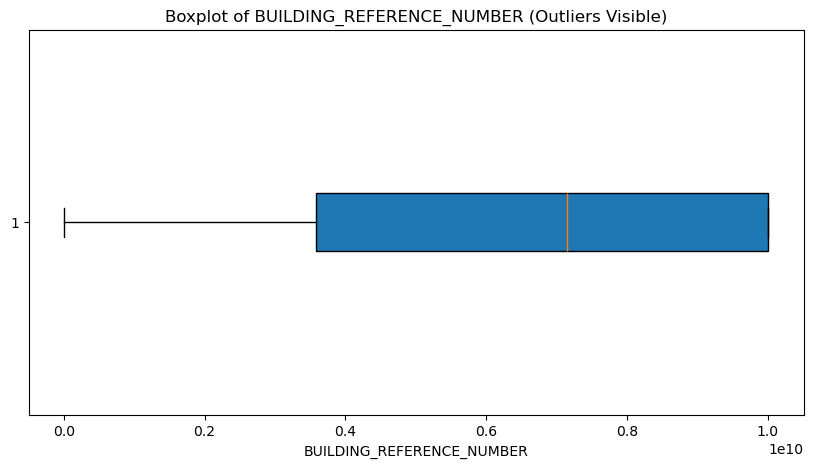

Column 'CURRENT_ENERGY_EFFICIENCY' has 0 outliers.


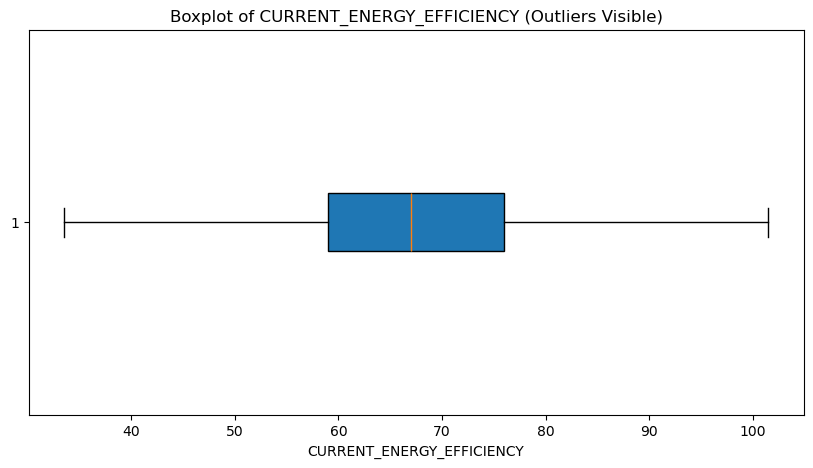

Column 'POTENTIAL_ENERGY_EFFICIENCY' has 0 outliers.


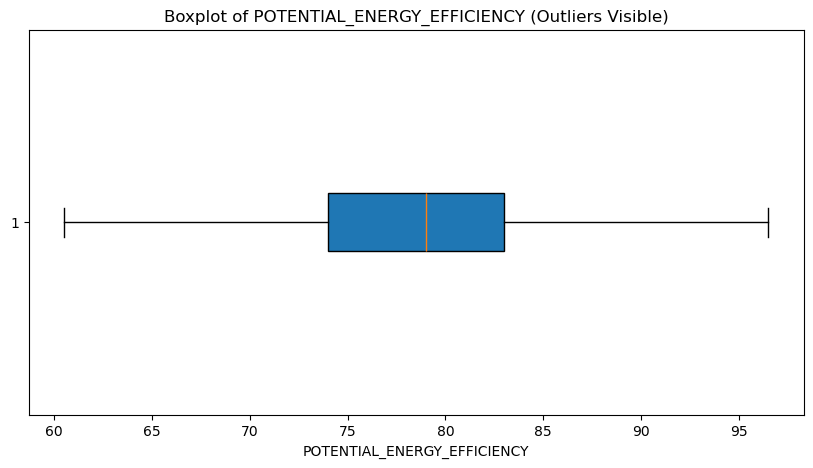

Column 'ENVIRONMENT_IMPACT_CURRENT' has 0 outliers.


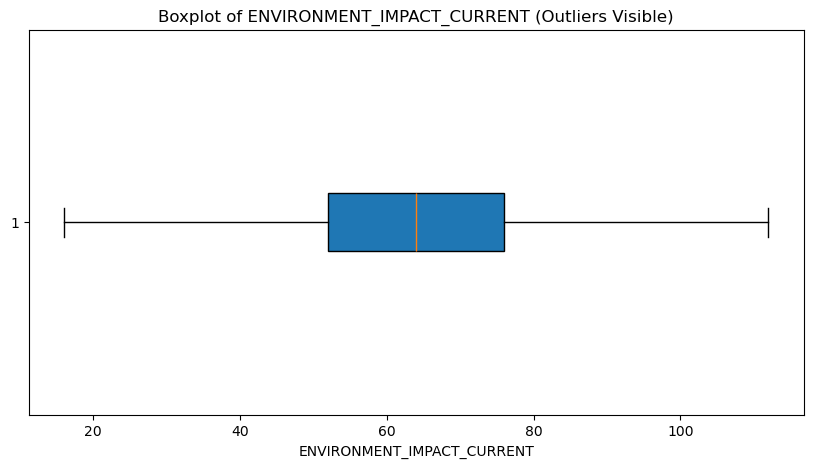

Column 'ENVIRONMENT_IMPACT_POTENTIAL' has 0 outliers.


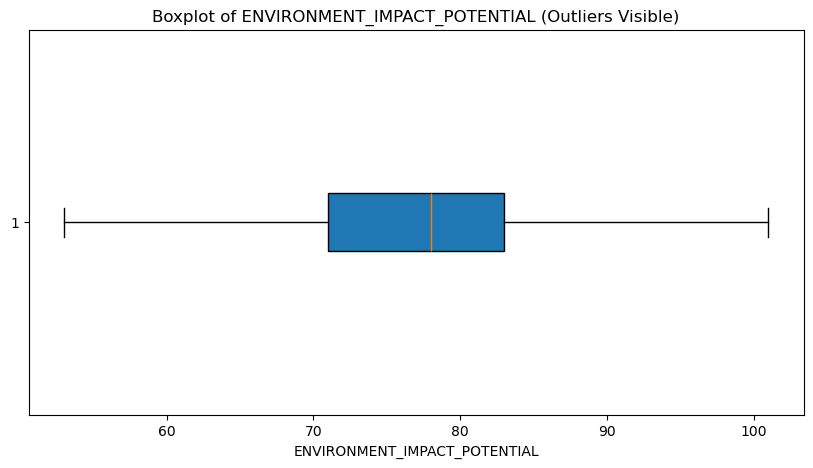

Column 'ENERGY_CONSUMPTION_CURRENT' has 0 outliers.


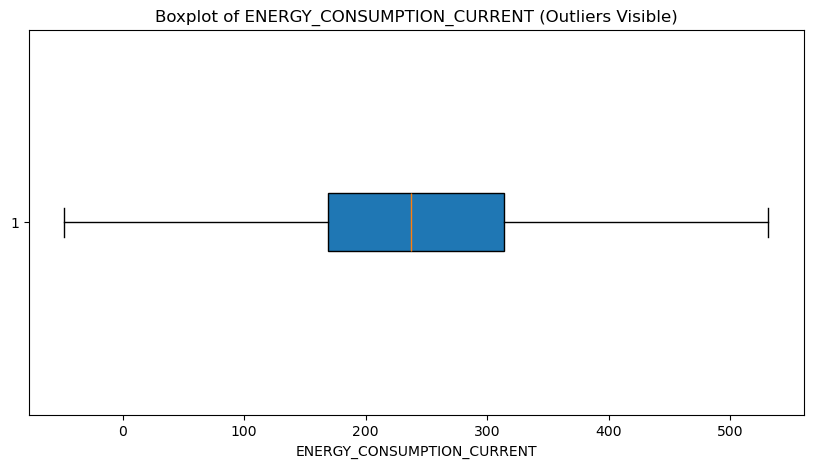

Column 'ENERGY_CONSUMPTION_POTENTIAL' has 0 outliers.


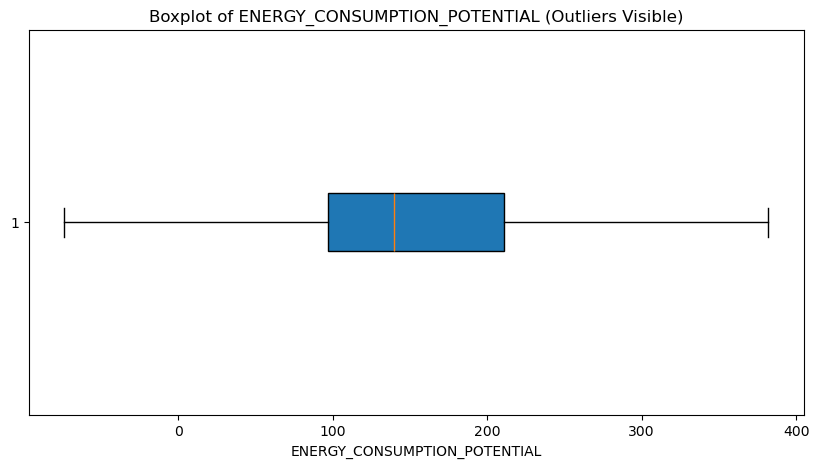

Column 'CO2_EMISSIONS_CURRENT' has 0 outliers.


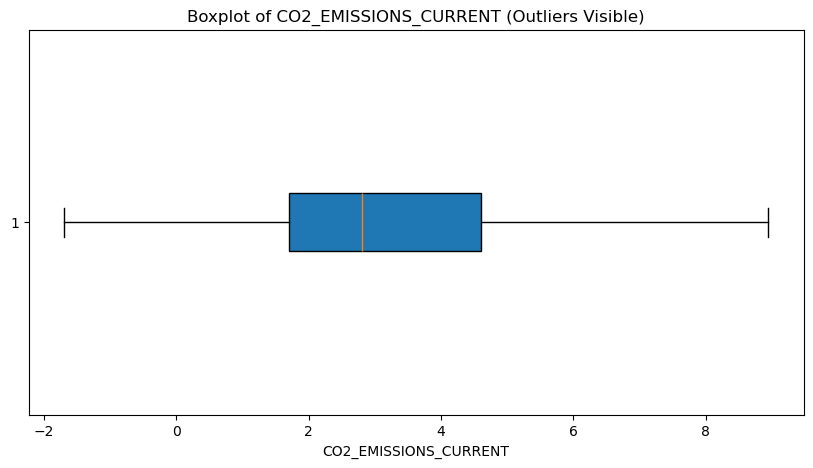

Column 'CO2_EMISS_CURR_PER_FLOOR_AREA' has 0 outliers.


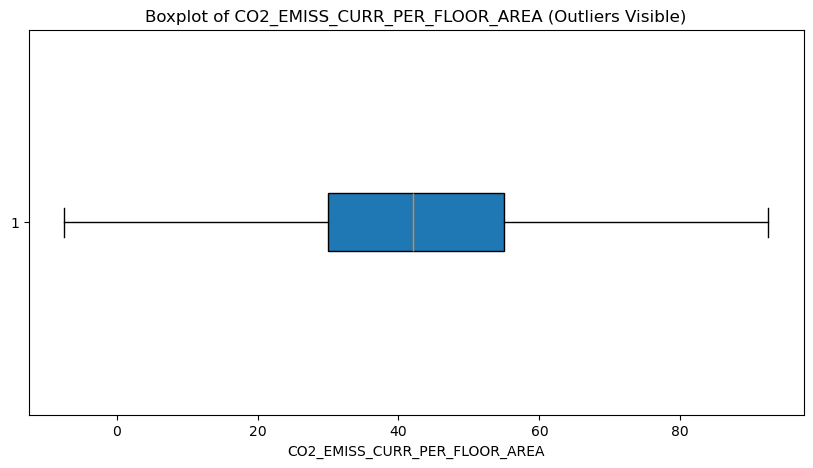

Column 'CO2_EMISSIONS_POTENTIAL' has 0 outliers.


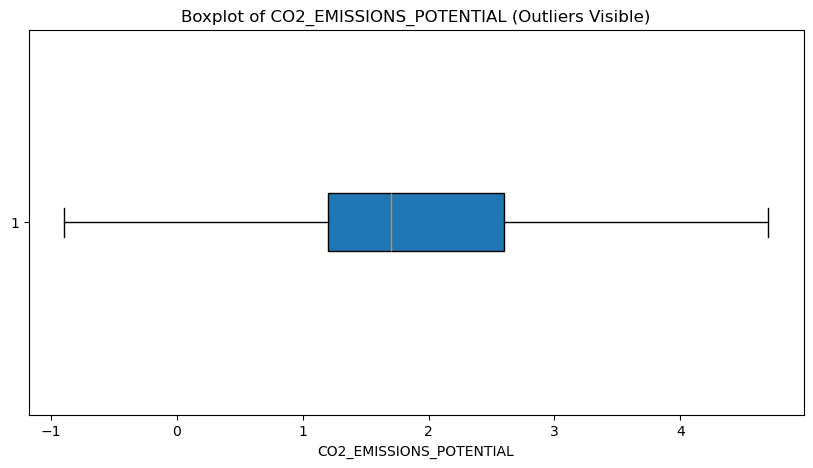

Column 'LIGHTING_COST_CURRENT' has 0 outliers.


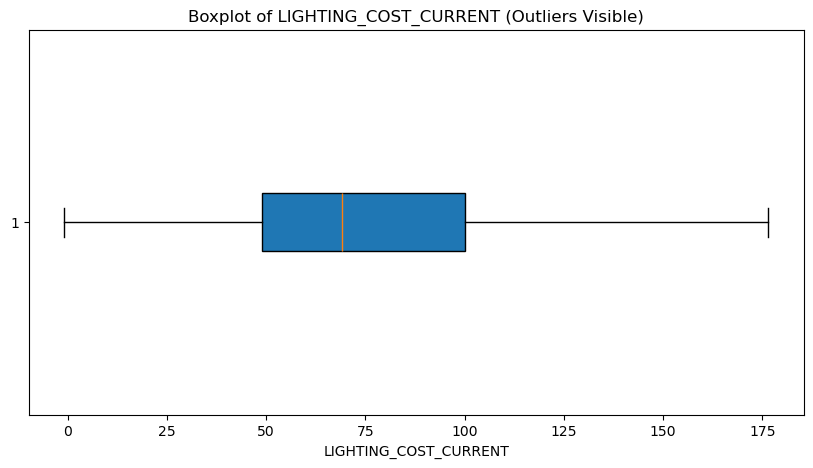

Column 'LIGHTING_COST_POTENTIAL' has 0 outliers.


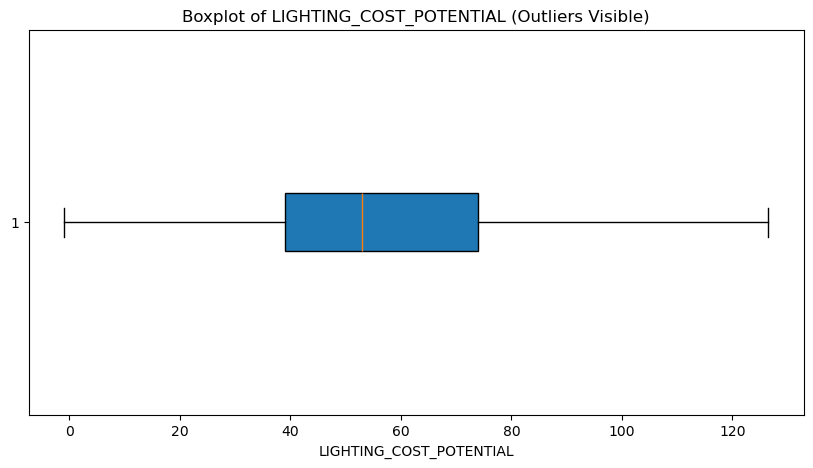

Column 'HEATING_COST_CURRENT' has 0 outliers.


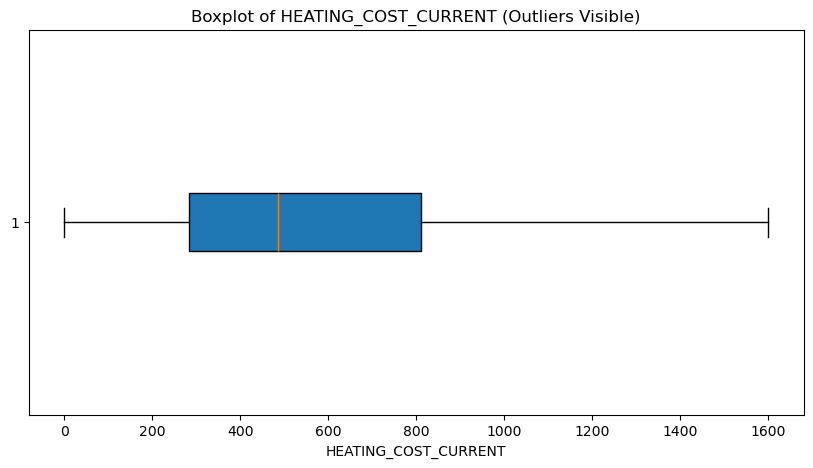

Column 'HEATING_COST_POTENTIAL' has 0 outliers.


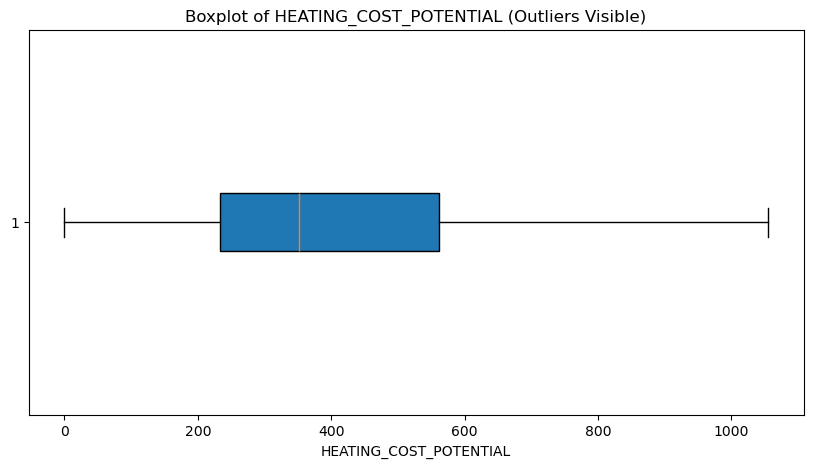

Column 'HOT_WATER_COST_CURRENT' has 0 outliers.


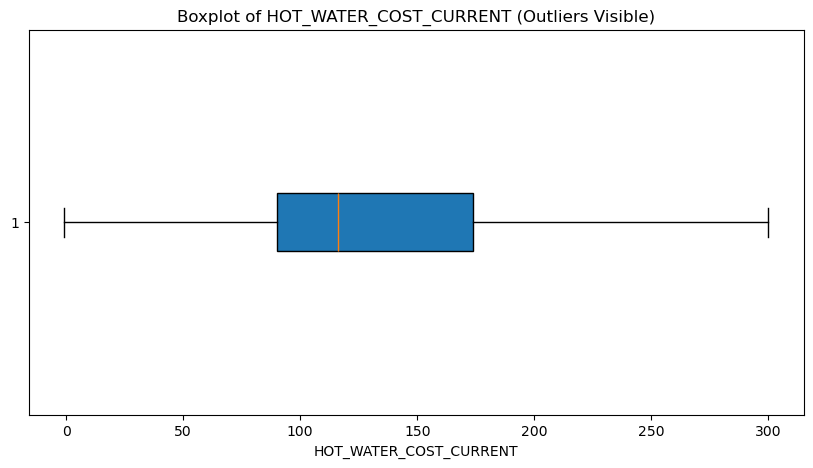

Column 'HOT_WATER_COST_POTENTIAL' has 0 outliers.


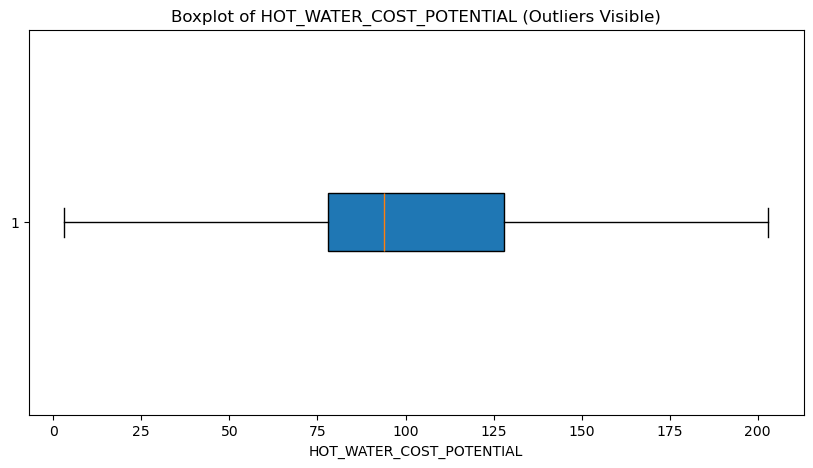

Column 'TOTAL_FLOOR_AREA' has 0 outliers.


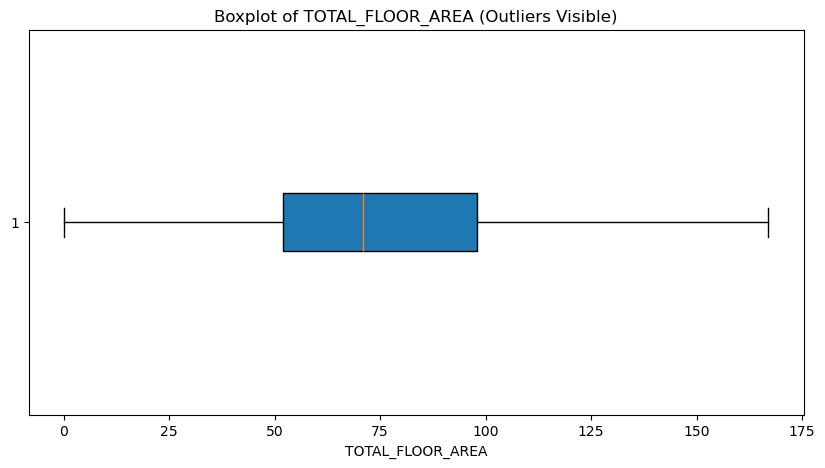

Column 'MULTI_GLAZE_PROPORTION' has 0 outliers.


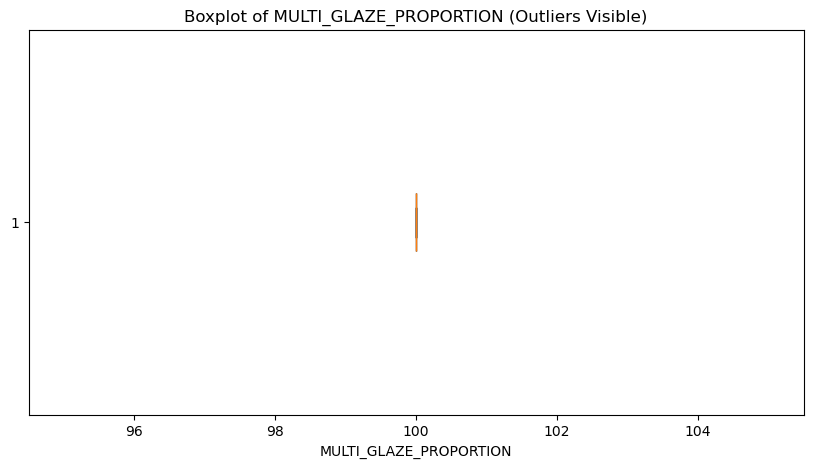

Column 'EXTENSION_COUNT' has 0 outliers.


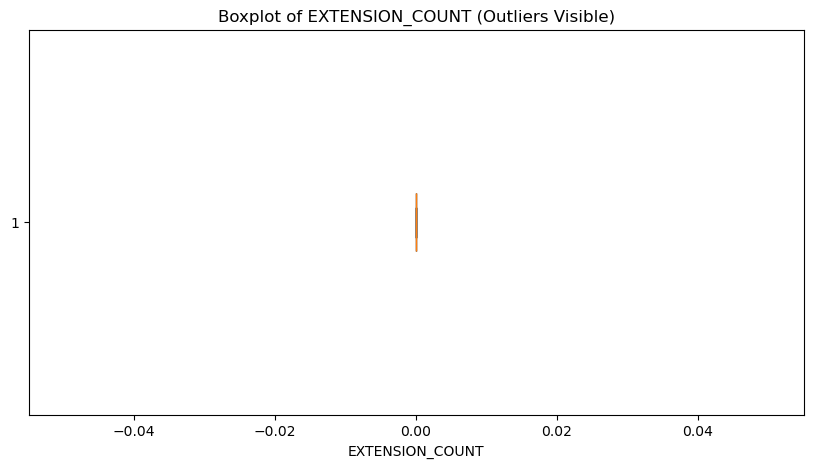

Column 'NUMBER_HABITABLE_ROOMS' has 0 outliers.


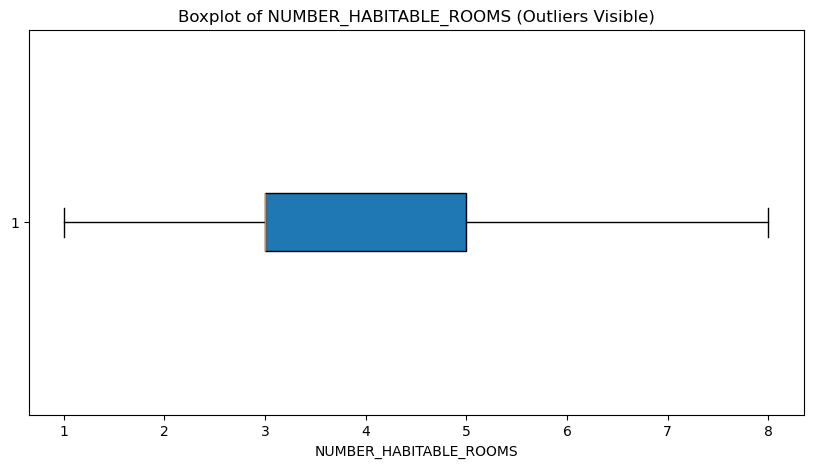

Column 'NUMBER_HEATED_ROOMS' has 0 outliers.


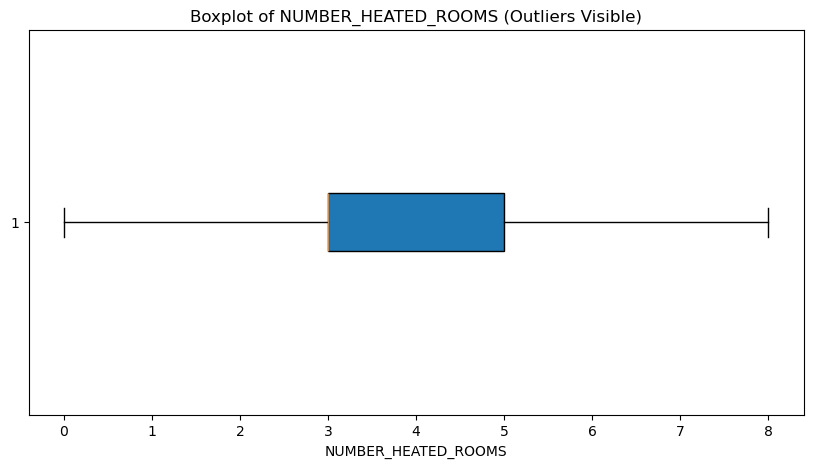

Column 'LOW_ENERGY_LIGHTING' has 0 outliers.


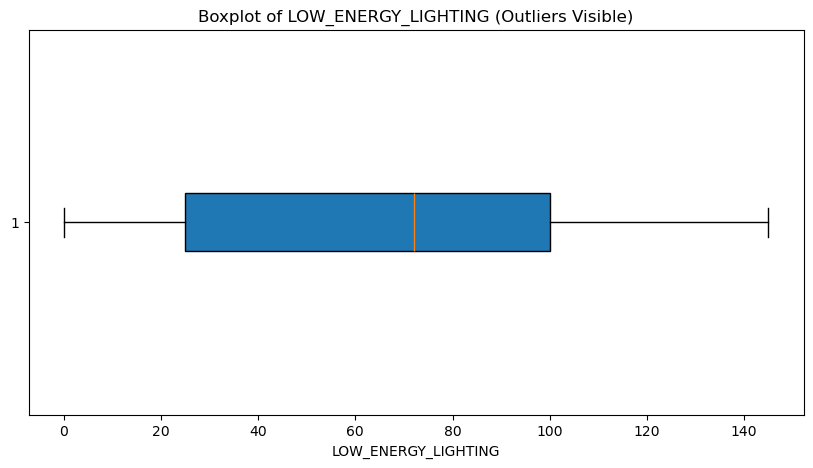

Column 'NUMBER_OPEN_FIREPLACES' has 0 outliers.


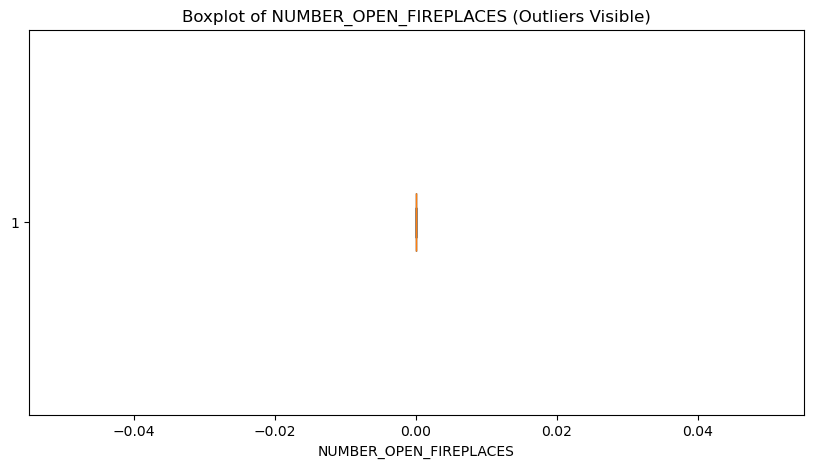

Column 'WIND_TURBINE_COUNT' has 0 outliers.


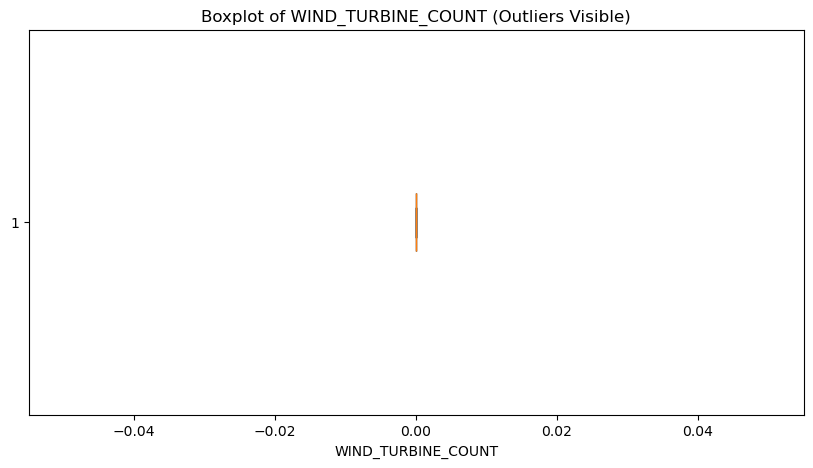

Column 'FLOOR_HEIGHT' has 0 outliers.


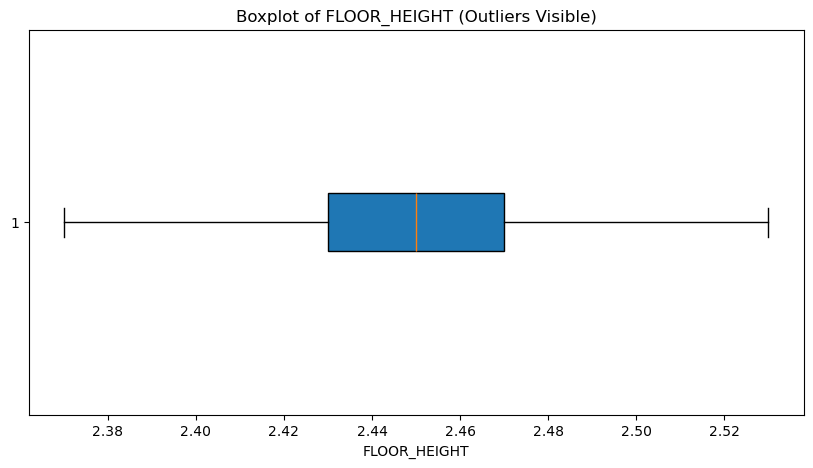

Column 'PHOTO_SUPPLY' has 0 outliers.


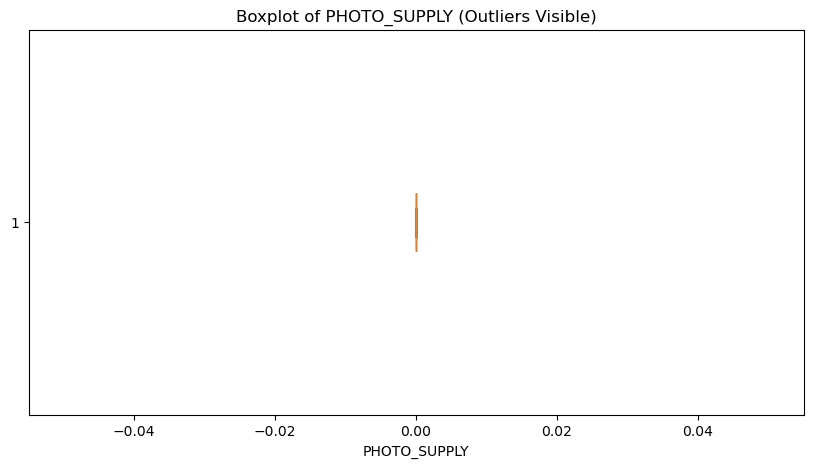

Column 'FIXED_LIGHTING_OUTLETS_COUNT' has 0 outliers.


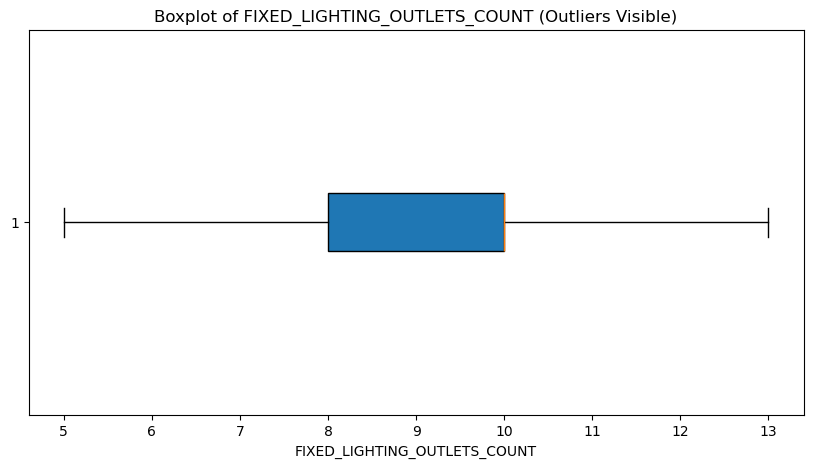

Column 'UPRN' has 0 outliers.


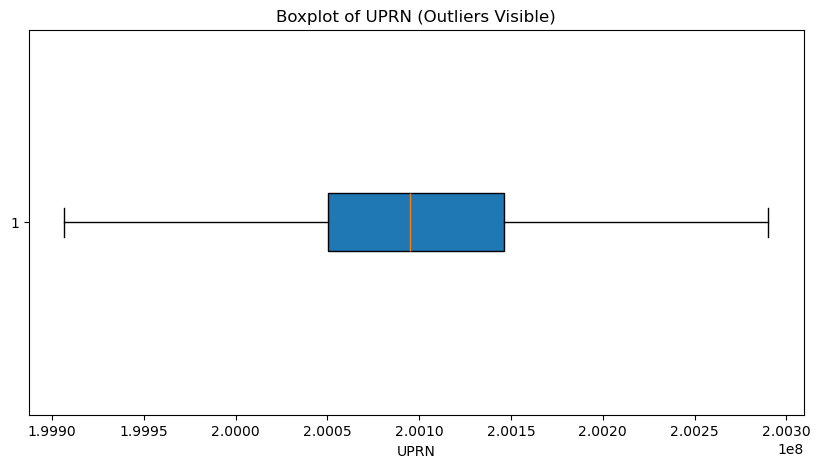

In [58]:
import matplotlib.pyplot as plt

# Identify numerical columns for outlier analysis
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers using IQR
for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_cleaned[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                        # Interquartile range
    lower_bound = Q1 - 1.5 * IQR         # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR         # Upper bound for outliers

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")

    # Optionally visualize the column with a boxplot
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_cleaned[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Outliers Visible)")
    plt.xlabel(col)
    plt.show()


By using both the Z-score & Interquartile Range(IQR) methods to double check we can confirm that the data after dropping some of the colums that had more than 51% null and imputing the rest of the missing values based on median / mode  that there are no duplicates or extreme outliers for us to remove effectively as the data looks thus no capping will be applied because it would artificially alter valid data which could end up introducing biases or distortions. 

In [65]:
# Print the list of remaining columns and their count
remaining_columns = df_cleaned.columns.tolist()
print(f"Number of Remaining Columns: {len(remaining_columns)}")
print("\nRemaining Columns After Dropping High-Missing-Value Columns:")
print(remaining_columns)


Number of Remaining Columns: 83

Remaining Columns After Dropping High-Missing-Value Columns:
['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM', 'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'GLAZED_AREA', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUM

From these 83 columns some are not needed we will be reviewing which ones are not to be kept.

[LMK_KEY] 
Individual lodgement identifier. Guaranteed to be unique and can be used to identify a certificate in the downloads and the API.
[Address_1]
First line of the address
[Address_2]
Second line of the address
[Postcode]
The postcode of the property
[BUILDING_REFERENCE_NUMBER]
Unique identifier for the property.
[INSPECTION_DATE]
The date that the inspection was actually carried out by the energy assessor
[LOCAL_AUTHORITY] 
Office for National Statistics (ONS) code. Local authority area in which the building is located.
[CONSTITUENCY]
Office for National Statistics (ONS) code. Parliamentary constituency in which the building is located.
[COUNTY]
County in which the building is located (where applicable) *they are all essentially within the Greater London Authority*
[LODGEMENT_DATE]
Date lodged on the Energy Performance of Buildings Register
[GLAZED_AREA]
Ranged estimate of the total glazed area of the Habitable Area.
[ROOF_DESCRIPTION] 
Overall description of the property feature
[ADDRESS]
Field containing the concatenation of address1, address2 and address3. Note that post code is recorded separately.
[LOCAL_AUTHORITY_LABEL]
The name of the local authority area in which the building is located. This field is for additional information only and should not be relied upon: please refer to the Local Authority ONS Code. * As all is filled with Barnet label *
[CONSTITUENCY_LABEL]
The name of the parliamentary constituency in which the building is located. This field is for additional information only and should not be relied upon: please refer to the Constituency ONS Code.
[POSTTOWN]
The post town of the property
[LODGEMENT_DATETIME]
Date and time lodged on the Energy Performance of Buildings Register.
[UPRN]
The UPRN submitted by an assessor or alternatively from the department’s address matching algorithm.
[UPRN_SOURCE]
Populated with the values "Energy Assessor" or "Address Matched" to show how the UPRN was populated.








-- na tsekarw -- 




[HEAT_LOSS_CORRIDOR]
Flats and maisonettes only. Indicates that the flat contains a corridor through which heat is lost. Heat loss corridor, one of: no corridor; heated corridor; unheated corridor * after reviewing the dataset and found most of them had no data and the rest disclaimed no corridor / unheated corridor I decided to drop this column as it would not offer valuable insight due to its poor diversity / features*

[PHOTO_SUPPLY] 
Percentage of photovoltaic area as a percentage of total roof area. 0% indicates that a Photovoltaic Supply is not present in the property.

[GLAZED_TYPE]
The type of glazing. From British Fenestration Rating Council or manufacturer declaration, one of; single; double; triple.

[NUMBER_OPEN_FIREPLACES]
The number of Open Fireplaces in the Property. An Open Fireplace is a fireplace that still allows air to pass between the inside of the Property and the outside.

[WIND_TURBINE_COUNT]
Number of wind turbines; 0 if none.



'GLAZED_TYPE', NUMBER_OPEN_FIREPLACES , WIND_TURBINE_COUNT


-- na tsekarw --




In [41]:
# Step 5: Save the cleaned dataset
cleaned_file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\cleaned_data.csv'  
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\cleaned_data.csv
